In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
# Import csv
lin_reg_df = pd.read_csv("merged_internet_access.csv")
lin_reg_df.head()

,geo_id,county_name,population,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,...,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over,dl_speed_100_ua,dl_speed_level_up,level_up_access_pop_percent
0,0500000US06033,"Lake County, California",64148,31879,32269,12830,51318,2090,642,1426,...,6706,8097,5137,5540,8591,3975,1375,25.0,100.0,0.880890
1,0500000US06043,"Mariposa County, California",17540,8920,8620,1909,15631,390,243,166,...,1614,2284,1503,1683,2778,1556,356,25.0,100.0,0.407778
2,0500000US06115,"Yuba County, California",75493,38468,37025,20990,54503,643,4977,2340,...,9193,8410,4592,4001,5647,2311,1117,25.0,100.0,0.758733
3,0500000US06013,"Contra Costa County, California",1133247,553701,579546,288101,845146,2376,182135,93683,...,151683,164203,78858,69200,99537,48565,21680,25.0,100.0,0.976652
4,0500000US06035,"Lassen County, California",31185,20671,10514,5834,25351,847,436,2695,...,4353,3899,1803,1891,2504,1250,403,25.0,100.0,0.517515


In [3]:
list(lin_reg_df.columns)

['geo_id',
 'county_name',
 'population',
 'sex_total_men',
 'sex_total_women',
 'race_hispanic_or_latino',
 'race_not_hispanic_or_latino',
 'race_american_indian_and_alaska_native',
 'race_asian',
 'race_black_or_african_american',
 'race_native_hawaiian_and_other_pacific_islander',
 'race_some_other_race',
 'race_two_or_more',
 'race_two_or_more_excluding_some_ther_and_three_or_more',
 'race_two_or_more_including_some_other',
 'race_white_alone',
 'occupation_population_16_and_over_total',
 'occupation_management_business_science_and_arts',
 'occupation_service',
 'occupation_sales_and_office',
 'occupation_natural_resources_construction_and_maintenance',
 'occupation_production_transporation_and_material_moving',
 'hh_with_computer_and_internet_total',
 'hh_with_computer',
 'hh_with_bb_internet_subscription',
 'industry_agriculture_forestry_fishing_and_hunting_and_mining',
 'industry_construction',
 'industry_manufacturing',
 'industry_wholesale_trade',
 'industry_retail_trade',
 'i

In [6]:
sex = lin_reg_df[["population", "sex_total_men", "sex_total_women"]]
sex.head()

,population,sex_total_men,sex_total_women
0,64148,31879,32269
1,17540,8920,8620
2,75493,38468,37025
3,1133247,553701,579546
4,31185,20671,10514


In [7]:
corrMatrix = sex.corr()
print (corrMatrix)

                 population  sex_total_men  sex_total_women
population         1.000000       0.999962         0.999964
sex_total_men      0.999962       1.000000         0.999853
sex_total_women    0.999964       0.999853         1.000000


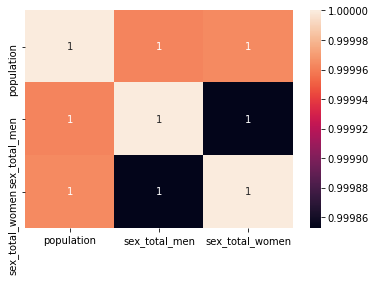

In [8]:
corrMatrix = sex.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
race = lin_reg_df[['race_hispanic_or_latino',
 'race_not_hispanic_or_latino',
 'race_american_indian_and_alaska_native',
 'race_asian',
 'race_black_or_african_american',
 'race_native_hawaiian_and_other_pacific_islander',
 'race_some_other_race',
 'race_two_or_more',
 'race_two_or_more_excluding_some_ther_and_three_or_more',
 'race_two_or_more_including_some_other',
 'race_white_alone']]
race.head()

,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone
0,12830,51318,2090,642,1426,30,142,1365,1348,17,45623
1,1909,15631,390,243,166,54,20,633,627,6,14125
2,20990,54503,643,4977,2340,292,126,4040,3982,58,42085
3,288101,845146,2376,182135,93683,5251,3829,54921,53181,1740,502951
4,5834,25351,847,436,2695,205,22,618,559,59,20528


In [7]:
corrMatrix = race.corr()
print (corrMatrix)

                                                    race_hispanic_or_latino  \
race_hispanic_or_latino                                            1.000000   
race_not_hispanic_or_latino                                        0.940720   
race_american_indian_and_alaska_native                             0.894650   
race_asian                                                         0.875205   
race_black_or_african_american                                     0.962612   
race_native_hawaiian_and_other_pacific_islander                    0.787520   
race_some_other_race                                               0.963285   
race_two_or_more                                                   0.903890   
race_two_or_more_excluding_some_ther_and_three_...                 0.899378   
race_two_or_more_including_some_other                              0.944410   
race_white_alone                                                   0.920171   

                                                   

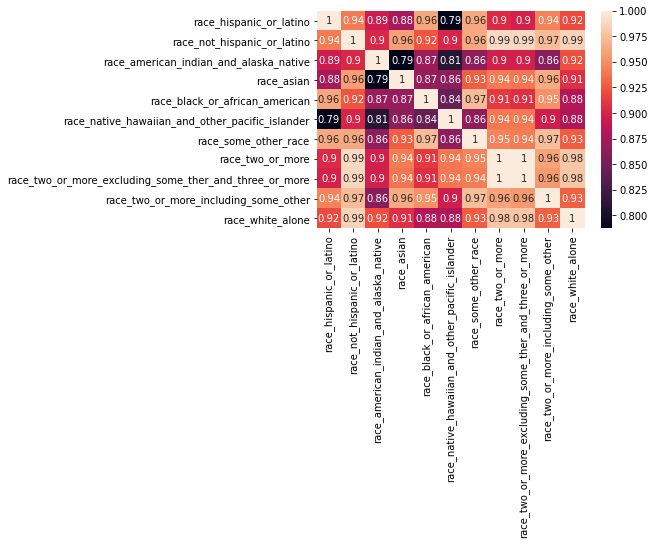

In [8]:
corrMatrix = race.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
occupation = lin_reg_df[['occupation_population_16_and_over_total',
 'occupation_management_business_science_and_arts',
 'occupation_service',
 'occupation_sales_and_office',
 'occupation_natural_resources_construction_and_maintenance',
 'occupation_production_transporation_and_material_moving']]
occupation.head()

,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving
0,23589,6424,6385,4546,3687,2547
1,7051,2043,2154,1485,657,712
2,28954,7773,5950,6599,4331,4301
3,547323,240244,96666,118637,42681,49095
4,8788,2562,2328,1768,1032,1098


In [10]:
corrMatrix = occupation.corr()
print (corrMatrix)

                                                    occupation_population_16_and_over_total  \
occupation_population_16_and_over_total                                            1.000000   
occupation_management_business_science_and_arts                                    0.991448   
occupation_service                                                                 0.998033   
occupation_sales_and_office                                                        0.998429   
occupation_natural_resources_construction_and_m...                                 0.977012   
occupation_production_transporation_and_materia...                                 0.985952   

                                                    occupation_management_business_science_and_arts  \
occupation_population_16_and_over_total                                                    0.991448   
occupation_management_business_science_and_arts                                            1.000000   
occupation_service       

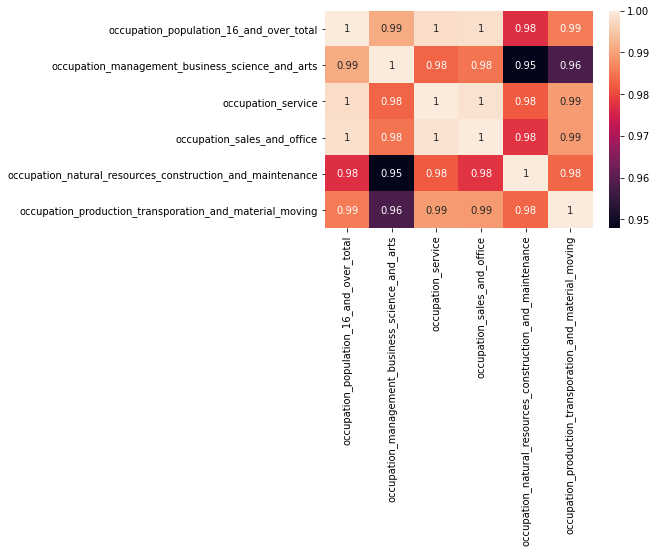

In [11]:
corrMatrix = occupation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
hh_comp_bb = lin_reg_df[['hh_with_computer_and_internet_total',
 'hh_with_computer',
 'hh_with_bb_internet_subscription']]
hh_comp_bb.head()

,hh_with_computer_and_internet_total,hh_with_computer,hh_with_bb_internet_subscription
0,25966,21733,18861
1,7700,6710,5861
2,26179,23373,21034
3,392277,370116,353692
4,9493,7990,7227


In [13]:
corrMatrix = hh_comp_bb.corr()
print (corrMatrix)

                                     hh_with_computer_and_internet_total  \
hh_with_computer_and_internet_total                             1.000000   
hh_with_computer                                                0.999798   
hh_with_bb_internet_subscription                                0.999239   

                                     hh_with_computer  \
hh_with_computer_and_internet_total          0.999798   
hh_with_computer                             1.000000   
hh_with_bb_internet_subscription             0.999809   

                                     hh_with_bb_internet_subscription  
hh_with_computer_and_internet_total                          0.999239  
hh_with_computer                                             0.999809  
hh_with_bb_internet_subscription                             1.000000  


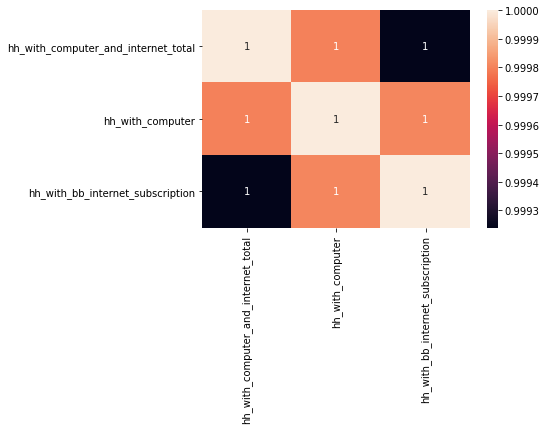

In [14]:
corrMatrix = hh_comp_bb.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [3]:
industry = lin_reg_df[['industry_agriculture_forestry_fishing_and_hunting_and_mining', 'industry_construction', 
                       'industry_manufacturing', 'industry_wholesale_trade', 'industry_retail_trade',
                       'industry_transportation_and_warehousing_and_utilities', 'industry_information', 
                       'industry_finance_and_insurance_real_estate_and_rental_and_leasing', 
                       'industry_professional_scientific_management_administrative_and_waste_management_services', 
                       'industry_educational_services_health_care_and_social_assistance', 
                       'industry_arts_entertainment_recreation_accommodation_and_food_services', 
                       'industry_other_services_except_public_administration', 'industry_public_administration']]
industry.head()

,industry_agriculture_forestry_fishing_and_hunting_and_mining,industry_construction,industry_manufacturing,industry_wholesale_trade,industry_retail_trade,industry_transportation_and_warehousing_and_utilities,industry_information,industry_finance_and_insurance_real_estate_and_rental_and_leasing,industry_professional_scientific_management_administrative_and_waste_management_services,industry_educational_services_health_care_and_social_assistance,industry_arts_entertainment_recreation_accommodation_and_food_services,industry_other_services_except_public_administration,industry_public_administration
0,1658,2083,909,382,2759,1121,313,724,2590,5898,1978,1301,1873
1,270,304,348,92,816,244,74,214,739,1221,1791,167,771
2,1230,2700,1689,698,3754,1415,586,1215,2803,6188,2642,1246,2788
3,3698,38721,36881,12747,56545,28780,15140,46505,88220,120380,49287,28545,21874
4,585,587,151,102,705,284,93,218,307,1945,614,253,2944


In [4]:
corrMatrix = industry.corr()
print (corrMatrix)

                                                    industry_agriculture_forestry_fishing_and_hunting_and_mining  \
industry_agriculture_forestry_fishing_and_hunti...                                           1.000000              
industry_construction                                                                        0.293957              
industry_manufacturing                                                                       0.249920              
industry_wholesale_trade                                                                     0.291733              
industry_retail_trade                                                                        0.290881              
industry_transportation_and_warehousing_and_uti...                                           0.272034              
industry_information                                                                         0.200792              
industry_finance_and_insurance_real_estate_and_...                      

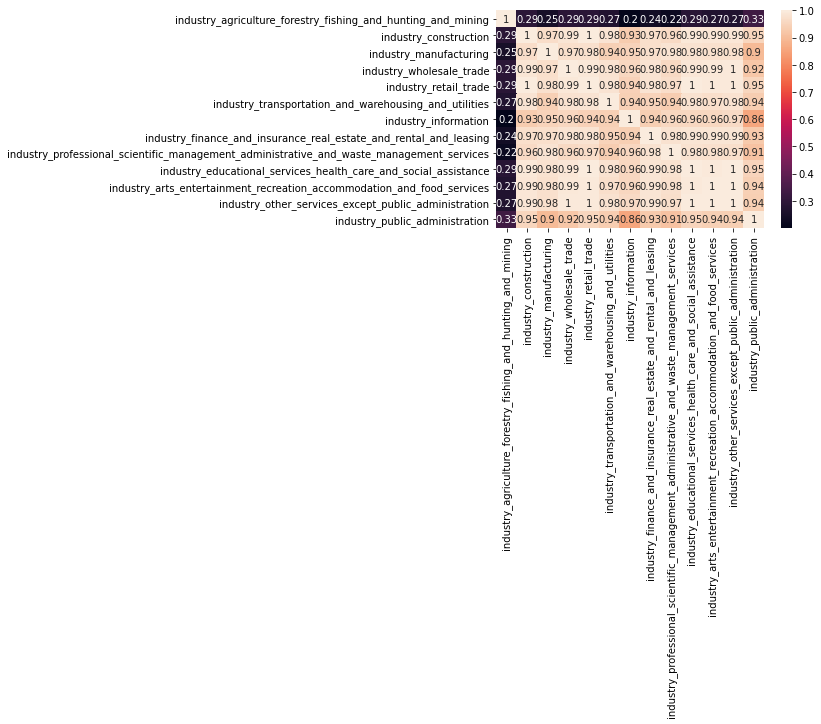

In [5]:
corrMatrix = industry.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
income = lin_reg_df[['hh_with_income_total',
 'hh_with_income_less_than_10000',
 'hh_with_income_10000-14999',
 'hh_with_income_15000-24999',
 'hh_with_income_25000-34999',
 'hh_with_income_35000-49999',
 'hh_with_income50000-74999',
 'hh_with_income_75000-99999',
 'hh_with_income_100000-149999',
 'hh_with_income_150000-199999',
 'hh_with_income_200000_and_greater',
 'hh_median_income',
 'hh_mean_income',]]
income.head()

,hh_with_income_total,hh_with_income_less_than_10000,hh_with_income_10000-14999,hh_with_income_15000-24999,hh_with_income_25000-34999,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000-199999,hh_with_income_200000_and_greater,hh_median_income,hh_mean_income
0,25966,2374,2051,3203,3247,3607,4030,3178,2609,959,708,42475,60847
1,7700,494,484,934,711,1133,1465,1060,873,384,162,51199,64590
2,26179,1289,1879,2835,2497,3956,4744,3264,3591,1450,674,52624,67391
3,392277,13870,11757,21416,22514,34834,54684,48475,74344,43088,67295,93712,128079
4,9493,497,609,941,909,1150,1979,1171,1388,599,250,56362,71097


In [16]:
corrMatrix = income.corr()
print (corrMatrix)

                                   hh_with_income_total  \
hh_with_income_total                           1.000000   
hh_with_income_less_than_10000                 0.989888   
hh_with_income_10000-14999                     0.982380   
hh_with_income_15000-24999                     0.986550   
hh_with_income_25000-34999                     0.990000   
hh_with_income_35000-49999                     0.992902   
hh_with_income50000-74999                      0.996423   
hh_with_income_75000-99999                     0.998424   
hh_with_income_100000-149999                   0.996115   
hh_with_income_150000-199999                   0.978460   
hh_with_income_200000_and_greater              0.927541   
hh_median_income                               0.231918   
hh_mean_income                                 0.250923   

                                   hh_with_income_less_than_10000  \
hh_with_income_total                                     0.989888   
hh_with_income_less_than_10000     

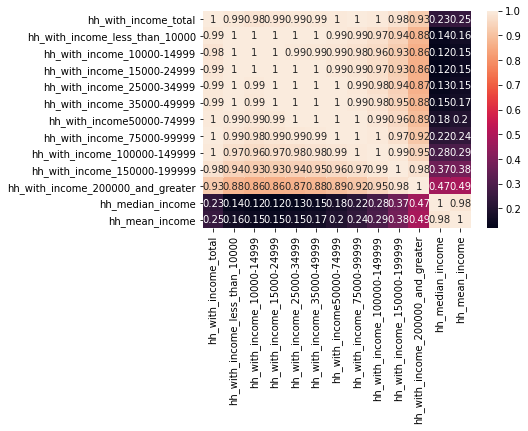

In [17]:
corrMatrix = income.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
income_totals = lin_reg_df[['hh_with_income_total',
 'hh_with_income_less_than_10000',
 'hh_with_income_10000-14999',
 'hh_with_income_15000-24999',
 'hh_with_income_25000-34999',
 'hh_with_income_35000-49999',
 'hh_with_income50000-74999',
 'hh_with_income_75000-99999',
 'hh_with_income_100000-149999',
 'hh_with_income_150000-199999',
 'hh_with_income_200000_and_greater']]
income_totals.head()

,hh_with_income_total,hh_with_income_less_than_10000,hh_with_income_10000-14999,hh_with_income_15000-24999,hh_with_income_25000-34999,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000-199999,hh_with_income_200000_and_greater
0,25966,2374,2051,3203,3247,3607,4030,3178,2609,959,708
1,7700,494,484,934,711,1133,1465,1060,873,384,162
2,26179,1289,1879,2835,2497,3956,4744,3264,3591,1450,674
3,392277,13870,11757,21416,22514,34834,54684,48475,74344,43088,67295
4,9493,497,609,941,909,1150,1979,1171,1388,599,250


In [20]:
corrMatrix = income_totals.corr()
print (corrMatrix)

                                   hh_with_income_total  \
hh_with_income_total                           1.000000   
hh_with_income_less_than_10000                 0.989888   
hh_with_income_10000-14999                     0.982380   
hh_with_income_15000-24999                     0.986550   
hh_with_income_25000-34999                     0.990000   
hh_with_income_35000-49999                     0.992902   
hh_with_income50000-74999                      0.996423   
hh_with_income_75000-99999                     0.998424   
hh_with_income_100000-149999                   0.996115   
hh_with_income_150000-199999                   0.978460   
hh_with_income_200000_and_greater              0.927541   

                                   hh_with_income_less_than_10000  \
hh_with_income_total                                     0.989888   
hh_with_income_less_than_10000                           1.000000   
hh_with_income_10000-14999                               0.997794   
hh_with_income_

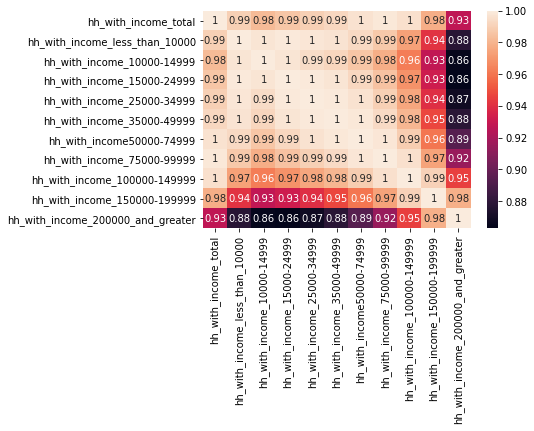

In [21]:
corrMatrix = income_totals.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [22]:
fam_structure = lin_reg_df[['family_structure_hh_total',
 'family_structure_hh_with_one_or_more_under_18']]
fam_structure.head()

,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18
0,25966,6757
1,7700,1922
2,26179,10190
3,392277,141689
4,9493,2417


In [23]:
corrMatrix = fam_structure.corr()
print (corrMatrix)

                                               family_structure_hh_total  \
family_structure_hh_total                                       1.000000   
family_structure_hh_with_one_or_more_under_18                   0.996727   

                                               family_structure_hh_with_one_or_more_under_18  
family_structure_hh_total                                                           0.996727  
family_structure_hh_with_one_or_more_under_18                                       1.000000  


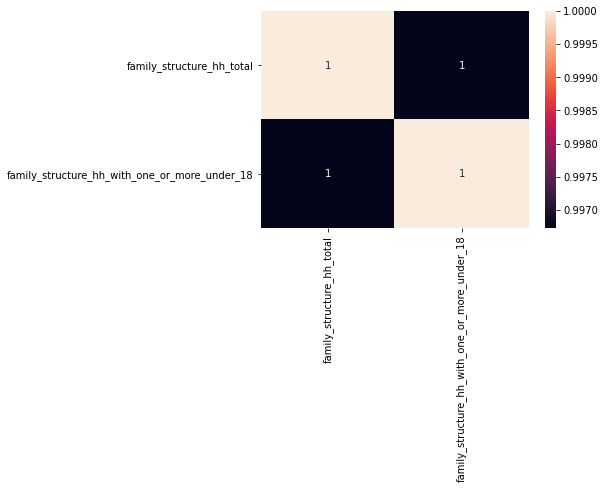

In [24]:
corrMatrix = fam_structure.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
employ = lin_reg_df[['employment_16_and_over_in_labor_force',
 'employment_employed',
 'employment_unemployed',
 'employment_not_in_labor_force']]
employ.head()

,employment_16_and_over_in_labor_force,employment_employed,employment_unemployed,employment_not_in_labor_force
0,26145,23589,2556,26171
1,7727,7051,676,7284
2,31602,28954,2648,23343
3,582886,547323,35563,318646
4,9358,8788,570,17347


In [26]:
corrMatrix = employ.corr()
print (corrMatrix)

                                       employment_16_and_over_in_labor_force  \
employment_16_and_over_in_labor_force                               1.000000   
employment_employed                                                 0.999944   
employment_unemployed                                               0.989292   
employment_not_in_labor_force                                       0.997283   

                                       employment_employed  \
employment_16_and_over_in_labor_force             0.999944   
employment_employed                               1.000000   
employment_unemployed                             0.987696   
employment_not_in_labor_force                     0.996539   

                                       employment_unemployed  \
employment_16_and_over_in_labor_force               0.989292   
employment_employed                                 0.987696   
employment_unemployed                               1.000000   
employment_not_in_labor_force   

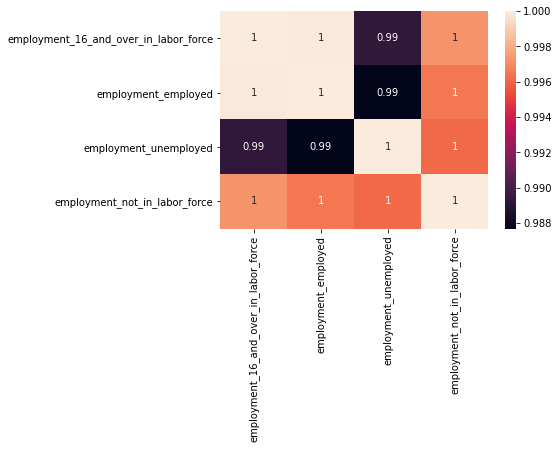

In [27]:
corrMatrix = employ.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [28]:
disability = lin_reg_df[['disability_population_under_18',
 'disability_population_18-64',
 'disability_population_65_and_over',
 'disability_under_18_with_disability',
 'disability_18-64_with_disability',
 'disability_64_and_over_with_disability']]
disability.head()


,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability
0,13272,36442,13737,399,6505,5862
1,2860,9845,4665,145,1528,1527
2,20850,43487,9002,1049,6852,3671
3,260902,699892,167209,9942,62588,54212
4,4891,12457,4028,269,1807,1523


In [29]:
corrMatrix = disability.corr()
print (corrMatrix)

                                        disability_population_under_18  \
disability_population_under_18                                1.000000   
disability_population_18-64                                   0.995255   
disability_population_65_and_over                             0.992877   
disability_under_18_with_disability                           0.994762   
disability_18-64_with_disability                              0.994399   
disability_64_and_over_with_disability                        0.995674   

                                        disability_population_18-64  \
disability_population_under_18                             0.995255   
disability_population_18-64                                1.000000   
disability_population_65_and_over                          0.997919   
disability_under_18_with_disability                        0.982972   
disability_18-64_with_disability                           0.990394   
disability_64_and_over_with_disability                 

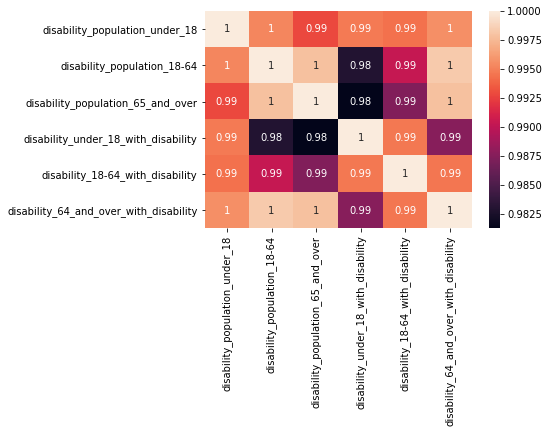

In [30]:
corrMatrix = disability.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [31]:
citizenship = lin_reg_df[['citizenship_native_born',
 'citizenship_foreign_born']]
citizenship.head()

,citizenship_native_born,citizenship_foreign_born
0,58466,5682
1,16293,1247
2,66060,9433
3,850039,283208
4,29559,1626


In [32]:
corrMatrix = citizenship.corr()
print (corrMatrix)

                          citizenship_native_born  citizenship_foreign_born
citizenship_native_born                  1.000000                  0.974836
citizenship_foreign_born                 0.974836                  1.000000


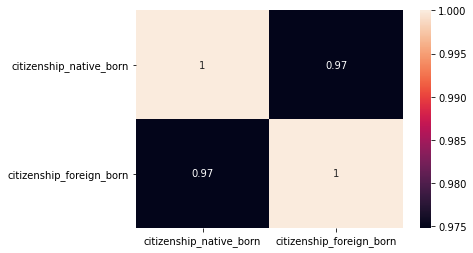

In [33]:
corrMatrix = citizenship.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
age = lin_reg_df[['age_under_5',
 'age_5-9',
 'age_10-14',
 'age_15-19',
 'age_20-24',
 'age_25-34',
 'age_35-44',
 'age_45-54',
 'age_55-59',
 'age_60-64',
 'age_65-74',
 'age_75-84',
 'age_85_and_over']]
age.head()

,age_under_5,age_5-9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,3683,3828,3496,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,762,761,751,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,6126,5796,5815,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,65505,73025,76328,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,1384,1272,1477,1444,3218,6287,4353,3899,1803,1891,2504,1250,403


In [38]:
corrMatrix = age.corr()
print (corrMatrix)

                 age_under_5   age_5-9  age_10-14  age_15-19  age_20-24  \
age_under_5         1.000000  0.999325   0.998765   0.998701   0.997566   
age_5-9             0.999325  1.000000   0.999709   0.998799   0.995415   
age_10-14           0.998765  0.999709   1.000000   0.999007   0.994867   
age_15-19           0.998701  0.998799   0.999007   1.000000   0.997739   
age_20-24           0.997566  0.995415   0.994867   0.997739   1.000000   
age_25-34           0.995133  0.991805   0.990964   0.992607   0.995910   
age_35-44           0.996139  0.994138   0.993946   0.994894   0.995774   
age_45-54           0.995421  0.994026   0.994576   0.995553   0.995252   
age_55-59           0.995712  0.994421   0.994890   0.995997   0.995791   
age_60-64           0.995160  0.993472   0.993515   0.994984   0.995792   
age_65-74           0.994131  0.993041   0.993413   0.994698   0.994520   
age_75-84           0.992915  0.991735   0.992450   0.993923   0.993618   
age_85_and_over     0.989

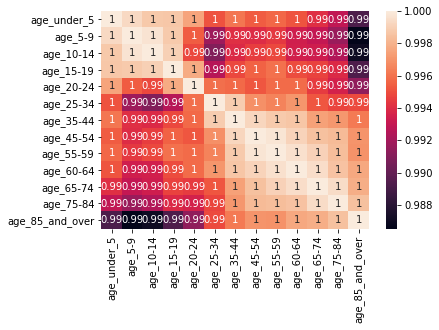

In [39]:
corrMatrix = age.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
corrMatrix = lin_reg_df.corr()
print (corrMatrix)

                             population  sex_total_men  sex_total_women  \
population                     1.000000       0.999962         0.999964   
sex_total_men                  0.999962       1.000000         0.999853   
sex_total_women                0.999964       0.999853         1.000000   
race_hispanic_or_latino        0.982468       0.982025         0.982829   
race_not_hispanic_or_latino    0.987462       0.987768         0.987091   
...                                 ...            ...              ...   
age_75-84                      0.997768       0.997662         0.997799   
age_85_and_over                0.995861       0.995687         0.995959   
dl_speed_100_ua                     NaN            NaN              NaN   
dl_speed_level_up                   NaN            NaN              NaN   
level_up_access_pop_percent    0.317853       0.318978         0.316733   

                             race_hispanic_or_latino  \
population                                 

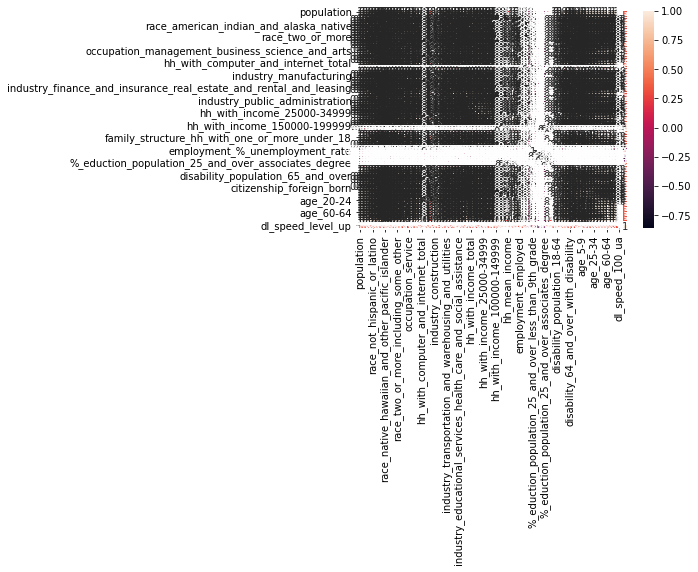

In [3]:
corrMatrix = lin_reg_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
# Linear regression between 'race_two_or_more' & 'race_two_or_more_excluding_some_ther_and_three_or_more' columns
race_reg = lin_reg_df['race_two_or_more'].corr(lin_reg_df['race_two_or_more_excluding_some_ther_and_three_or_more'])
race_reg

0.9998712625749289

In [7]:
hh_comp_tot_reg = lin_reg_df['hh_with_computer_and_internet_total'].corr(lin_reg_df['hh_with_computer'])
hh_comp_tot_reg

0.99979812592852

In [8]:
hh_bb_tot_reg = lin_reg_df['hh_with_computer_and_internet_total'].corr(lin_reg_df['hh_with_bb_internet_subscription'])
hh_bb_tot_reg

0.9992391219897908

In [9]:
hh_comp_bb_reg = lin_reg_df['hh_with_computer'].corr(lin_reg_df['hh_with_bb_internet_subscription'])
hh_comp_bb_reg

0.9998086122802008

In [10]:
sex = lin_reg_df['sex_total_men'].corr(lin_reg_df['sex_total_women'])
sex

0.9998528287638053